In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy import stats
import statsmodels.api as sm 
from scipy import stats

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression 
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.metrics import accuracy_score, mean_absolute_error, root_mean_squared_error, mean_squared_error

pd.set_option("display.max_columns", None)


In [2]:
# Read the CSV file 'data/data_4.csv' into a pandas DataFrame
data = pd.read_csv('data/data_4.csv')

In [3]:
# Display the first few rows of the DataFrame `data`
data.head()


,Age,Education_Level,Occupation,Number_of_Dependents,Location,Work_Experience,Marital_Status,Employment_Status,Household_Size,Homeownership_Status,Type_of_Housing,Gender,Primary_Mode_of_Transportation,Income
0,56,Master's,Technology,5,Urban,21,Married,Full-time,7,Own,Apartment,Male,Public transit,72510
1,69,High School,Finance,0,Urban,4,Single,Full-time,7,Own,Apartment,Male,Biking,75462
2,46,Bachelor's,Technology,1,Urban,1,Single,Full-time,7,Own,Single-family home,Female,Car,71748
3,32,High School,Others,2,Urban,32,Married,Full-time,1,Own,Apartment,Female,Car,74520
4,60,Bachelor's,Finance,3,Urban,15,Married,Self-employed,4,Own,Townhouse,Male,Walking,640210


In [4]:
# Print a concise summary of the DataFrame `data`, including the column names, data types, and memory usage
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Age                             10000 non-null  int64 
 1   Education_Level                 10000 non-null  object
 2   Occupation                      10000 non-null  object
 3   Number_of_Dependents            10000 non-null  int64 
 4   Location                        10000 non-null  object
 5   Work_Experience                 10000 non-null  int64 
 6   Marital_Status                  10000 non-null  object
 7   Employment_Status               10000 non-null  object
 8   Household_Size                  10000 non-null  int64 
 9   Homeownership_Status            10000 non-null  object
 10  Type_of_Housing                 10000 non-null  object
 11  Gender                          10000 non-null  object
 12  Primary_Mode_of_Transportation  10000 non-null 

In [5]:
# Generate descriptive statistics summary for numerical columns in the DataFrame `data`
data.describe()


,Age,Number_of_Dependents,Work_Experience,Household_Size,Income
count,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04
mean,44.021700,2.527000,24.858800,3.989600,8.168382e+05
std,15.203998,1.713991,14.652622,2.010496,1.821089e+06
min,18.000000,0.000000,0.000000,1.000000,3.104400e+04
25%,31.000000,1.000000,12.000000,2.000000,6.844600e+04
50%,44.000000,3.000000,25.000000,4.000000,7.294300e+04
75%,57.000000,4.000000,37.000000,6.000000,3.506675e+05
max,70.000000,5.000000,50.000000,7.000000,9.992571e+06


In [6]:
# Generate descriptive statistics summary for categorical (object) columns in the DataFrame `data`
data.describe(include='object')

,Education_Level,Occupation,Location,Marital_Status,Employment_Status,Homeownership_Status,Type_of_Housing,Gender,Primary_Mode_of_Transportation
count,10000,10000,10000,10000,10000,10000,10000,10000,10000
unique,4,5,3,3,3,2,3,2,4
top,Bachelor's,Healthcare,Urban,Married,Full-time,Own,Single-family home,Male,Public transit
freq,4058,3035,7037,5136,5004,6018,4055,5123,4047


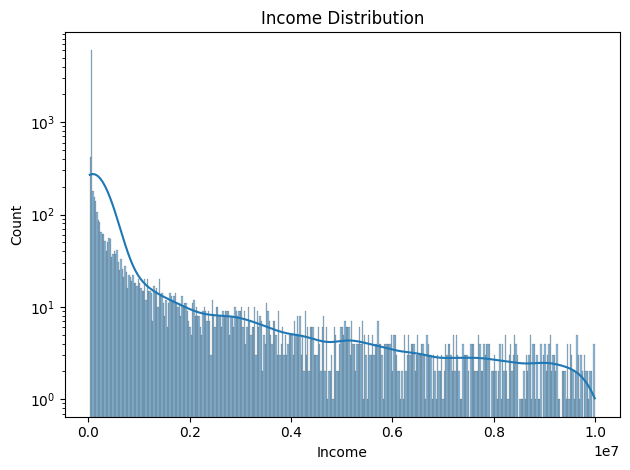

In [7]:
# Create a histogram plot of the 'Income' column from the DataFrame `data`
sns.histplot(data=data, x='Income', kde=True)

# Add title to the plot
plt.title('Income Distribution')

# Set y-axis scale to logarithmic
plt.yscale('log')

# Label the x-axis
plt.xlabel('Income')

# Adjust layout to prevent overlapping elements
plt.tight_layout()

# Display the plot
plt.show()

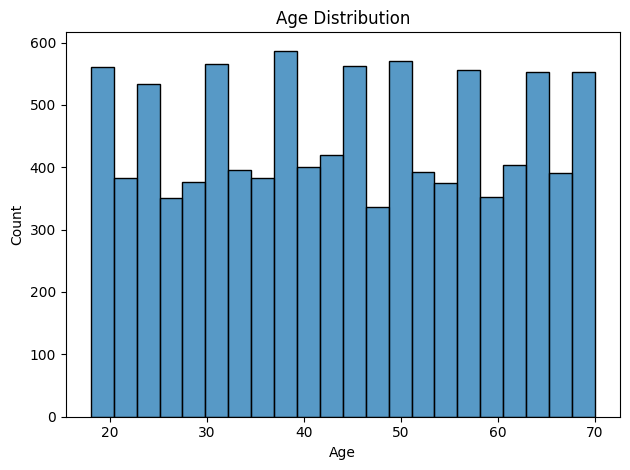

In [8]:
# Create a histogram plot of the 'Age' column from the DataFrame `data`
sns.histplot(data=data, x='Age')

# Add title to the plot
plt.title('Age Distribution')


# Label the x-axis
plt.xlabel('Age')

# Adjust layout to prevent overlapping elements
plt.tight_layout()

# Display the plot
plt.show()

In [9]:
# Count the occurrences of each unique value in the 'Education_Level' column and reset index
educate = data['Education_Level'].value_counts().reset_index(name='count')

# Display the resulting DataFrame
educate

,Education_Level,count
0,Bachelor's,4058
1,High School,2959
2,Master's,2482
3,Doctorate,501


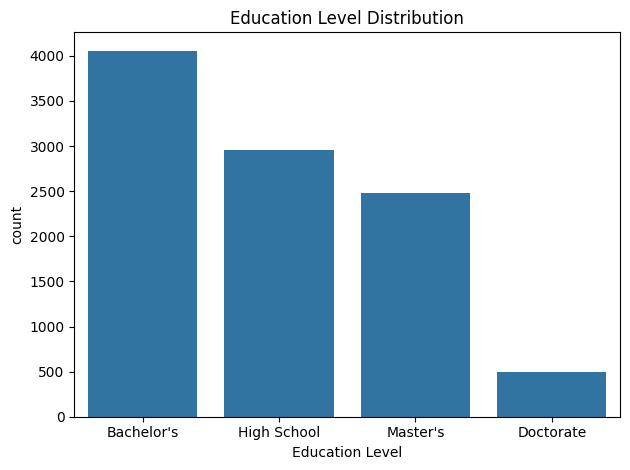

In [10]:
# Create a bar plot using Seaborn's barplot function
sns.barplot(x='Education_Level', y='count', data=educate)

# Add title to the plot
plt.title('Education Level Distribution')

# Label the x-axis
plt.xlabel('Education Level')

# Adjust layout to prevent overlapping elements
plt.tight_layout()

# Display the plot
plt.show()

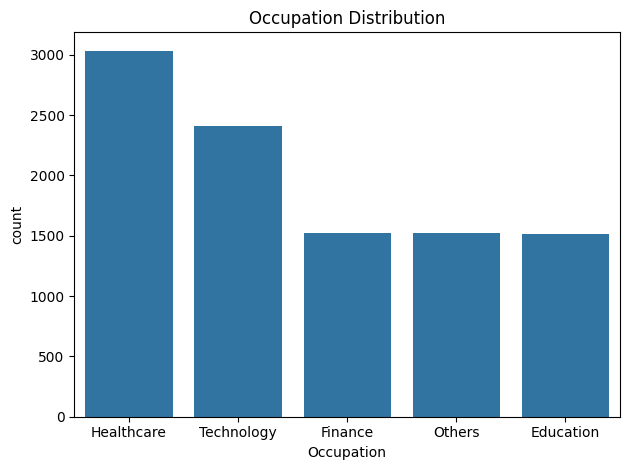

In [11]:
# Calculate the counts of each unique value in the 'Occupation' column and reset index
educate = data['Occupation'].value_counts().reset_index(name='count')

# Create a bar plot using Seaborn's barplot function
sns.barplot(x='Occupation', y='count', data=educate)

# Add title to the plot
plt.title('Occupation Distribution')

# Label the x-axis
plt.xlabel('Occupation')

# Adjust layout to prevent overlapping elements
plt.tight_layout()

# Display the plot
plt.show()


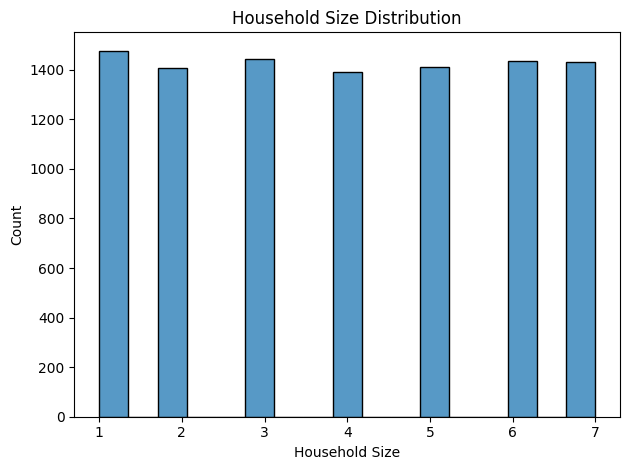

In [12]:
# Create a histogram plot of the 'Household_Size' column from the DataFrame `data`
sns.histplot(data=data, x='Household_Size')

# Add title to the plot
plt.title('Household Size Distribution')

# Label the x-axis
plt.xlabel('Household Size')

# Adjust layout to prevent overlapping elements
plt.tight_layout()

# Display the plot
plt.show()

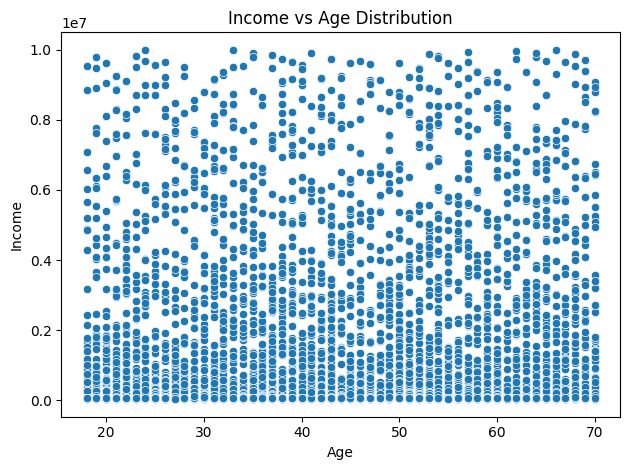

In [13]:
# Create a scatter plot of 'Income' (y-axis) against 'Age' (x-axis) from the DataFrame `data`
sns.scatterplot(data=data, y='Income', x='Age')

# Add title to the plot
plt.title('Income vs Age Distribution')

# Adjust layout to prevent overlapping elements
plt.tight_layout()

# Display the plot
plt.show()

In [14]:
# Calculate and print the correlation coefficient between 'Age' and 'Income'
print('The correlation between Age and income is {}'.format(data['Age'].corr(data['Income'])))

The correlation between Age and income is 0.008739454992626367


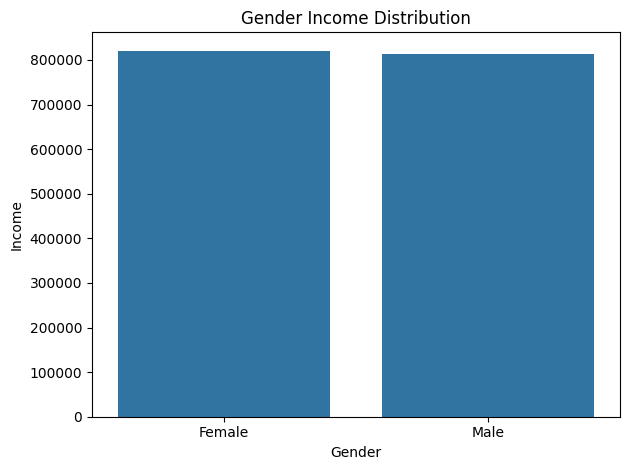

In [15]:
# Group data by 'Gender' and calculate the mean income for each gender
gender = data.groupby('Gender').agg({'Income':'mean'})

# Create a bar plot of mean income by gender using Seaborn's barplot function
sns.barplot(x='Gender', y='Income', data=gender)

# Add title to the plot
plt.title('Gender Income Distribution')

# Label the x-axis
plt.xlabel('Gender')

# Adjust layout to prevent overlapping elements
plt.tight_layout()

# Display the plot
plt.show()


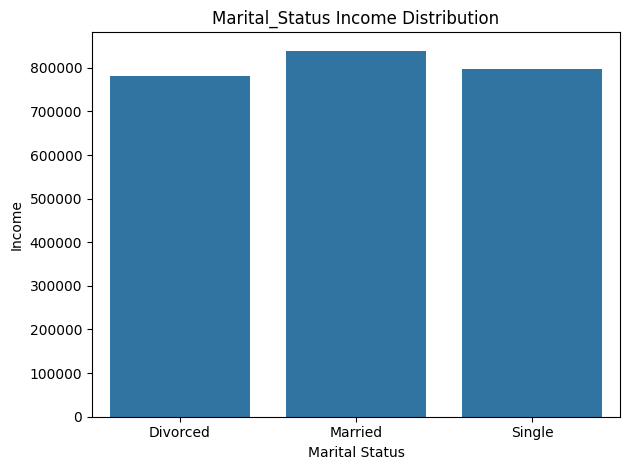

In [16]:
# Group data by 'Marital_Status' and calculate the mean income for each marital status
status = data.groupby('Marital_Status').agg({'Income':'mean'})

# Create a bar plot of mean income by marital status using Seaborn's barplot function
sns.barplot(x='Marital_Status', y='Income', data=status)

# Add title to the plot
plt.title('Marital_Status Income Distribution')

# Label the x-axis
plt.xlabel('Marital Status')

# Label the y-axis
plt.ylabel('Income')

# Adjust layout to prevent overlapping elements
plt.tight_layout()

# Display the plot
plt.show()

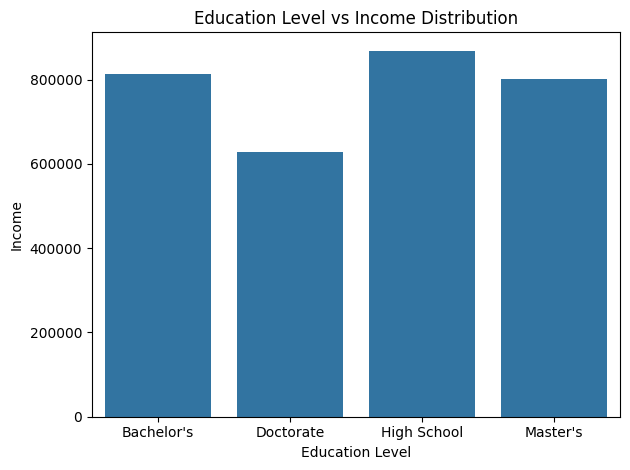

In [17]:
# Group data by 'Education_Level' and calculate the mean income for each education level
stat = data.groupby('Education_Level').agg({'Income':'mean'})

# Create a bar plot of mean income by education level using Seaborn's barplot function
sns.barplot(x='Education_Level', y='Income', data=stat)

# Add title to the plot
plt.title('Education Level vs Income Distribution')

# Label the x-axis
plt.xlabel('Education Level')

# Label the y-axis
plt.ylabel('Income')

# Adjust layout to prevent overlapping elements
plt.tight_layout()

# Display the plot
plt.show()

In [18]:
# Retrieve unique values from the 'Education_Level' column in the DataFrame `data`
data['Education_Level'].unique()


array(["Master's", 'High School', "Bachelor's", 'Doctorate'], dtype=object)

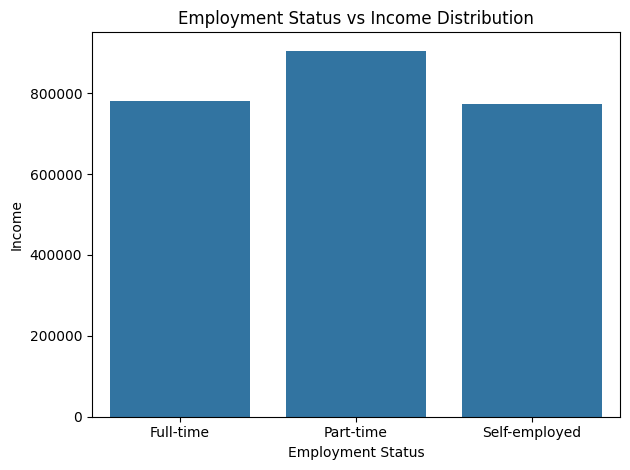

In [19]:
# Group data by 'Employment_Status' and calculate the mean income for each employment status
stat = data.groupby('Employment_Status').agg({'Income':'mean'})

# Create a bar plot of mean income by employment status using Seaborn's barplot function
sns.barplot(x='Employment_Status', y='Income', data=stat)

# Add title to the plot
plt.title('Employment Status vs Income Distribution')

# Label the x-axis
plt.xlabel('Employment Status')

# Label the y-axis
plt.ylabel('Income')

# Adjust layout to prevent overlapping elements
plt.tight_layout()

# Display the plot
plt.show()

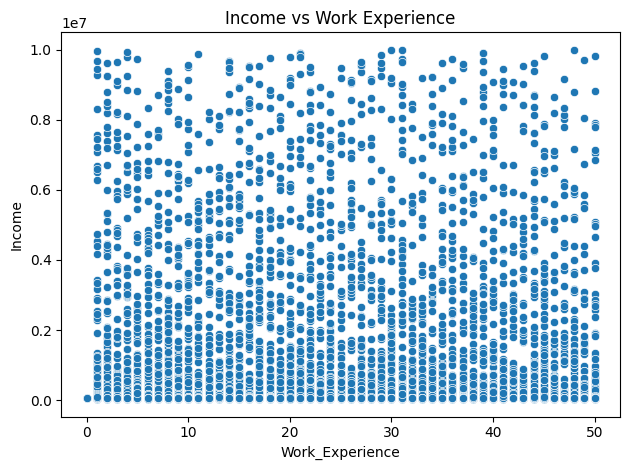

In [20]:
# Create a scatter plot of 'Income' (y-axis) against 'Work_Experience' (x-axis) from the DataFrame `data`
sns.scatterplot(data=data, y='Income', x='Work_Experience')

# Add title to the plot
plt.title('Income vs Work Experience')

# Adjust layout to prevent overlapping elements
plt.tight_layout()

# Display the plot
plt.show()

In [21]:
# Calculate and print the correlation coefficient between 'Work_Experience' and 'Income'
print('The correlation between Work Experience and income is {}'.format(data['Work_Experience'].corr(data['Income'])))

The correlation between Work Experience and income is -0.027540830456251456


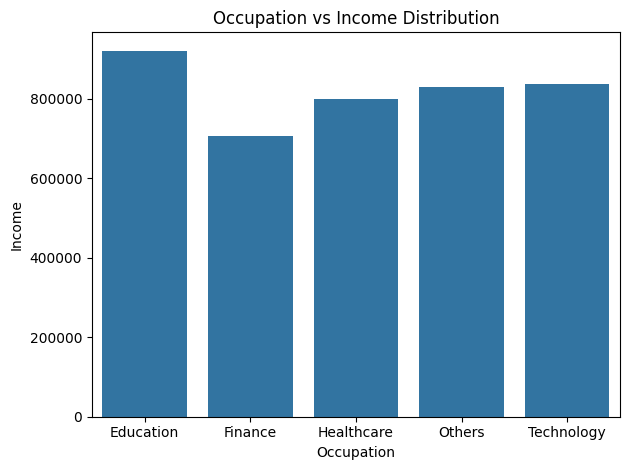

In [22]:
# Group data by 'Occupation' and calculate the mean income for each occupation
stat = data.groupby('Occupation').agg({'Income':'mean'})

# Create a bar plot of mean income by occupation using Seaborn's barplot function
sns.barplot(x='Occupation', y='Income', data=stat)

# Add title to the plot
plt.title('Occupation vs Income Distribution')

# Label the x-axis
plt.xlabel('Occupation')

# Label the y-axis
plt.ylabel('Income')

# Adjust layout to prevent overlapping elements
plt.tight_layout()

# Display the plot
plt.show()

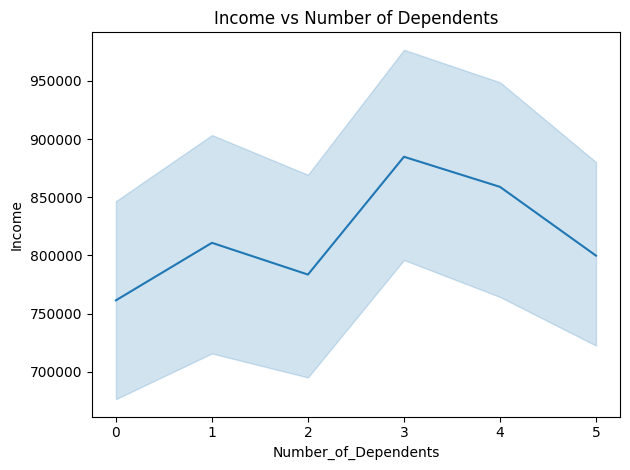

In [23]:
# Group data by 'Number_of_Dependents' and calculate the mean income for each number of dependents
depend = data.groupby('Number_of_Dependents').agg({'Income':'mean'})

# Create a line plot of income against number of dependents using Seaborn's lineplot function
sns.lineplot(data=data, y='Income', x='Number_of_Dependents')

# Add title to the plot
plt.title('Income vs Number of Dependents')

# Adjust layout to prevent overlapping elements
plt.tight_layout()

# Display the plot
plt.show()

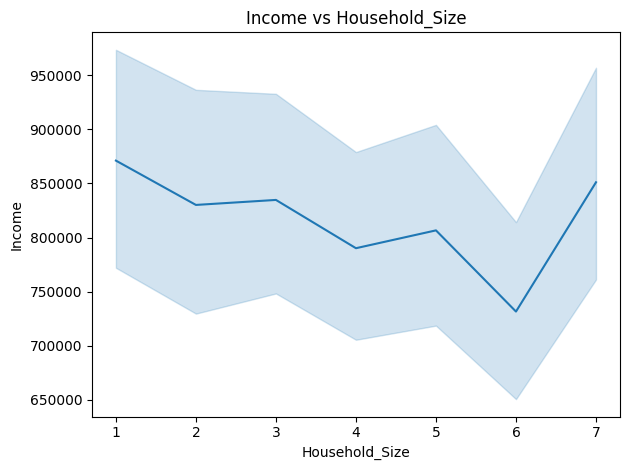

In [24]:
# Group data by 'Household_Size' and calculate the mean income for each household size
depend = data.groupby('Household_Size').agg({'Income':'mean'})

# Create a line plot of income against household size using Seaborn's lineplot function
sns.lineplot(data=data, y='Income', x='Household_Size')

# Add title to the plot
plt.title('Income vs Household_Size')

# Adjust layout to prevent overlapping elements
plt.tight_layout()

# Display the plot
plt.show()

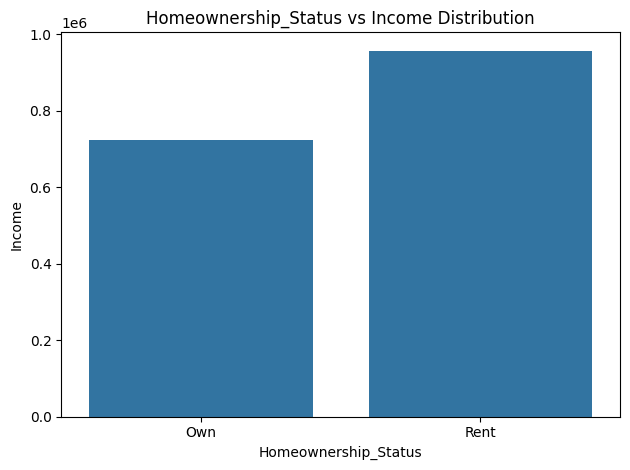

In [25]:
# Group data by 'Homeownership_Status' and calculate the mean income for each homeownership status
stat = data.groupby('Homeownership_Status').agg({'Income':'mean'})

# Create a bar plot of mean income by homeownership status using Seaborn's barplot function
sns.barplot(x='Homeownership_Status', y='Income', data=stat)

# Add title to the plot
plt.title('Homeownership_Status vs Income Distribution')

# Label the x-axis
plt.xlabel('Homeownership_Status')

# Label the y-axis
plt.ylabel('Income')

# Adjust layout to prevent overlapping elements
plt.tight_layout()

# Display the plot
plt.show()

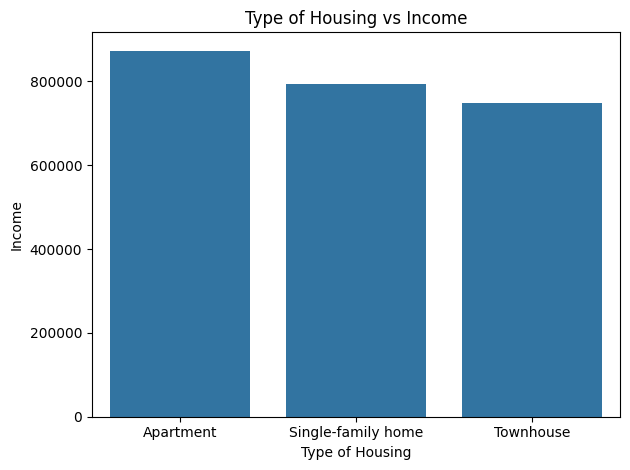

In [26]:
# Group data by 'Type_of_Housing' and calculate the mean income for each type of housing
hous = data.groupby('Type_of_Housing').agg({'Income':'mean'})

# Create a bar plot of mean income by type of housing using Seaborn's barplot function
sns.barplot(x='Type_of_Housing', y='Income', data=hous)

# Add title to the plot
plt.title('Type of Housing vs Income')

# Label the x-axis
plt.xlabel('Type of Housing')

# Label the y-axis
plt.ylabel('Income')

# Adjust layout to prevent overlapping elements
plt.tight_layout()

# Display the plot
plt.show()

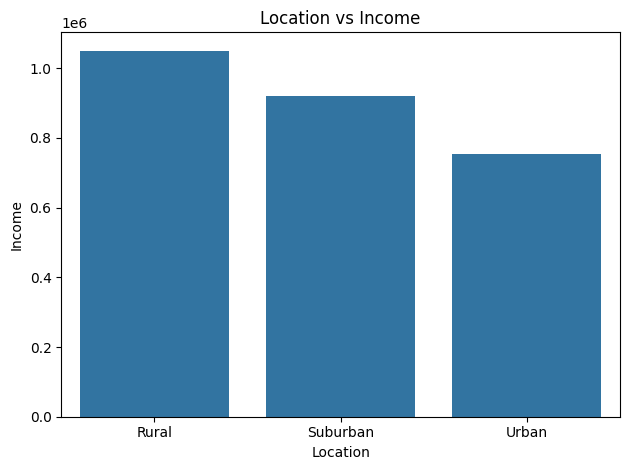

In [27]:
# Group data by 'Location' and calculate the mean income for each location
locate = data.groupby('Location').agg({'Income':'mean'})

# Create a bar plot of mean income by location using Seaborn's barplot function
sns.barplot(data=locate, x='Location', y='Income')

# Label the x-axis
plt.xlabel('Location')

# Label the y-axis
plt.ylabel('Income')

# Add title to the plot
plt.title('Location vs Income')

# Adjust layout to prevent overlapping elements
plt.tight_layout()

# Display the plot
plt.show()

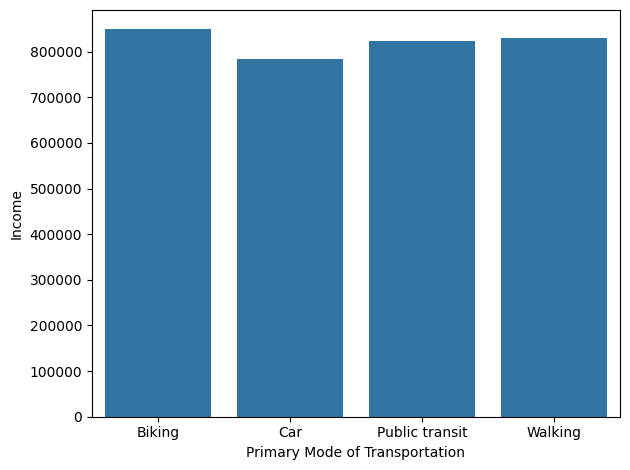

In [28]:
# Group data by 'Primary_Mode_of_Transportation' and calculate the mean income for each mode of transportation
transport = data.groupby('Primary_Mode_of_Transportation').agg({'Income':'mean'}).sort_index()

# Create a bar plot of mean income by primary mode of transportation using Seaborn's barplot function
sns.barplot(x='Primary_Mode_of_Transportation', y='Income', data=transport)

# Label the x-axis
plt.xlabel('Primary Mode of Transportation')

# Label the y-axis
plt.ylabel('Income')

# Adjust layout to prevent overlapping elements
plt.tight_layout()

# Display the plot
plt.show()

In [29]:
# Select columns from the DataFrame `data` that are of integer type
num_cols = data.select_dtypes(include='int').columns

In [30]:
# Select columns from the DataFrame `data` that are of object type (typically strings)
cat_cols = data.select_dtypes(include='object').columns


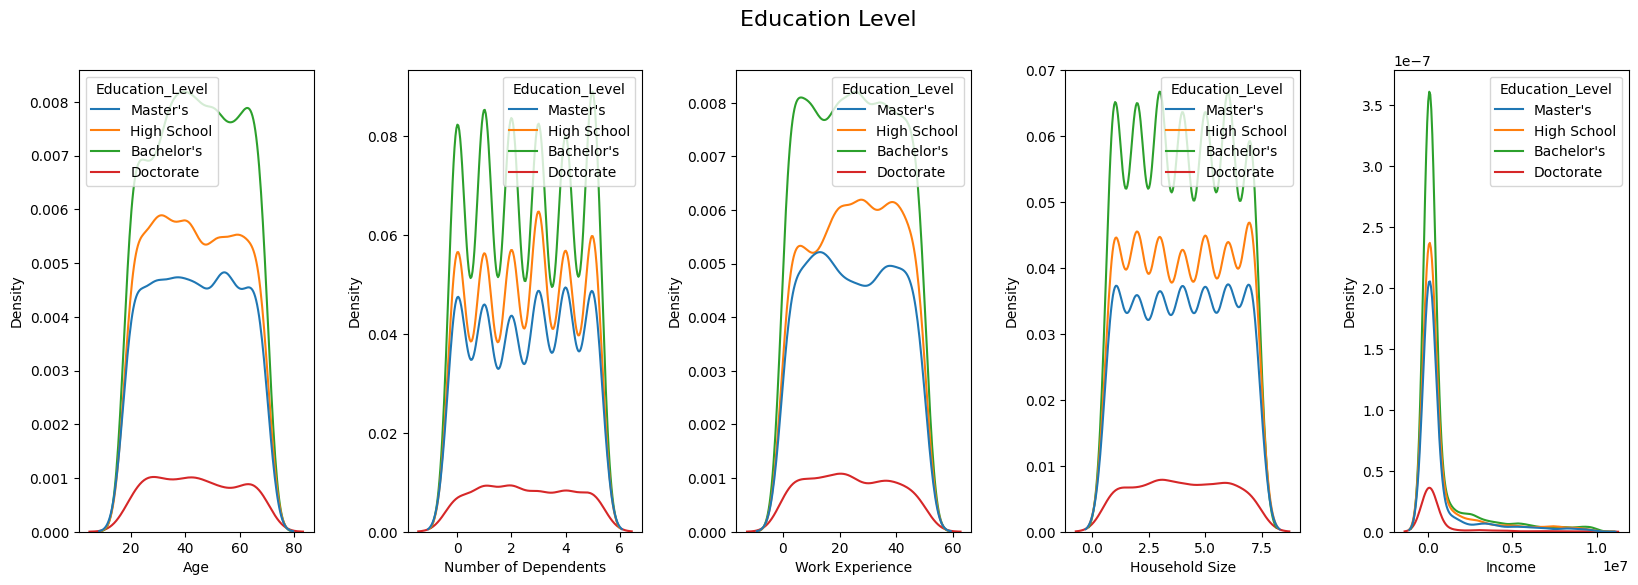

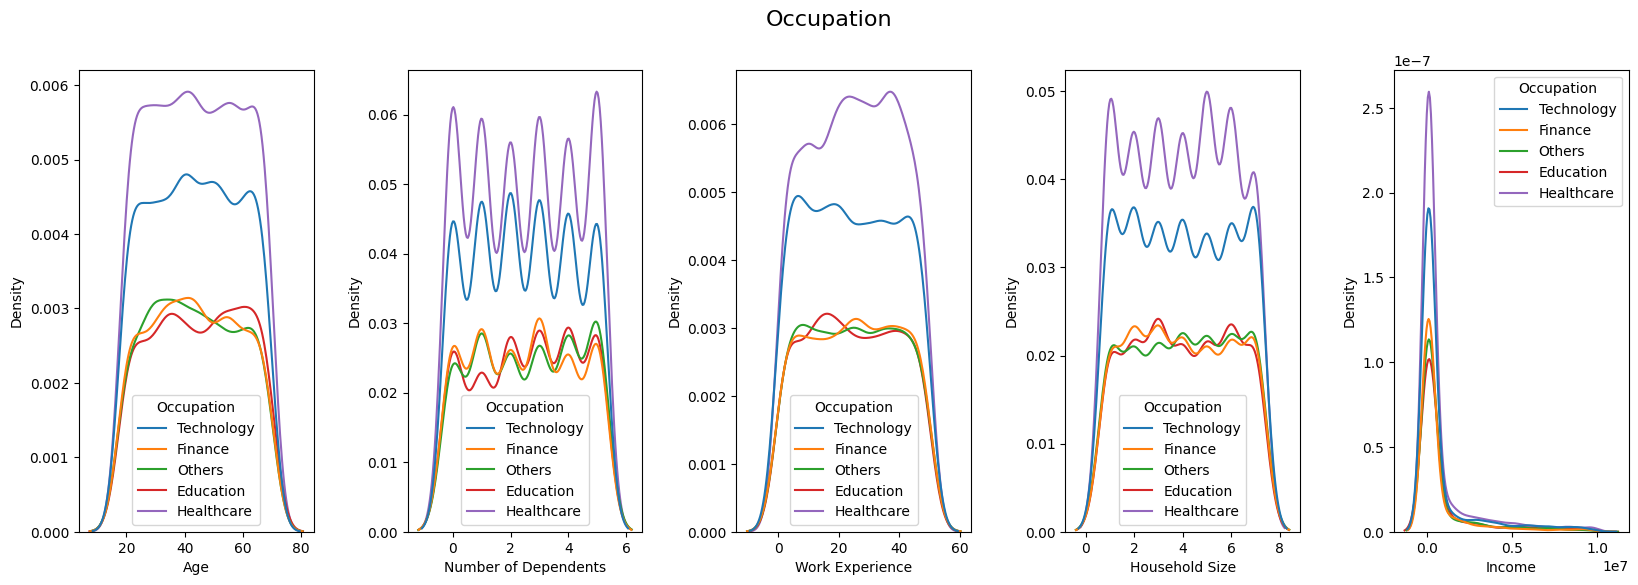

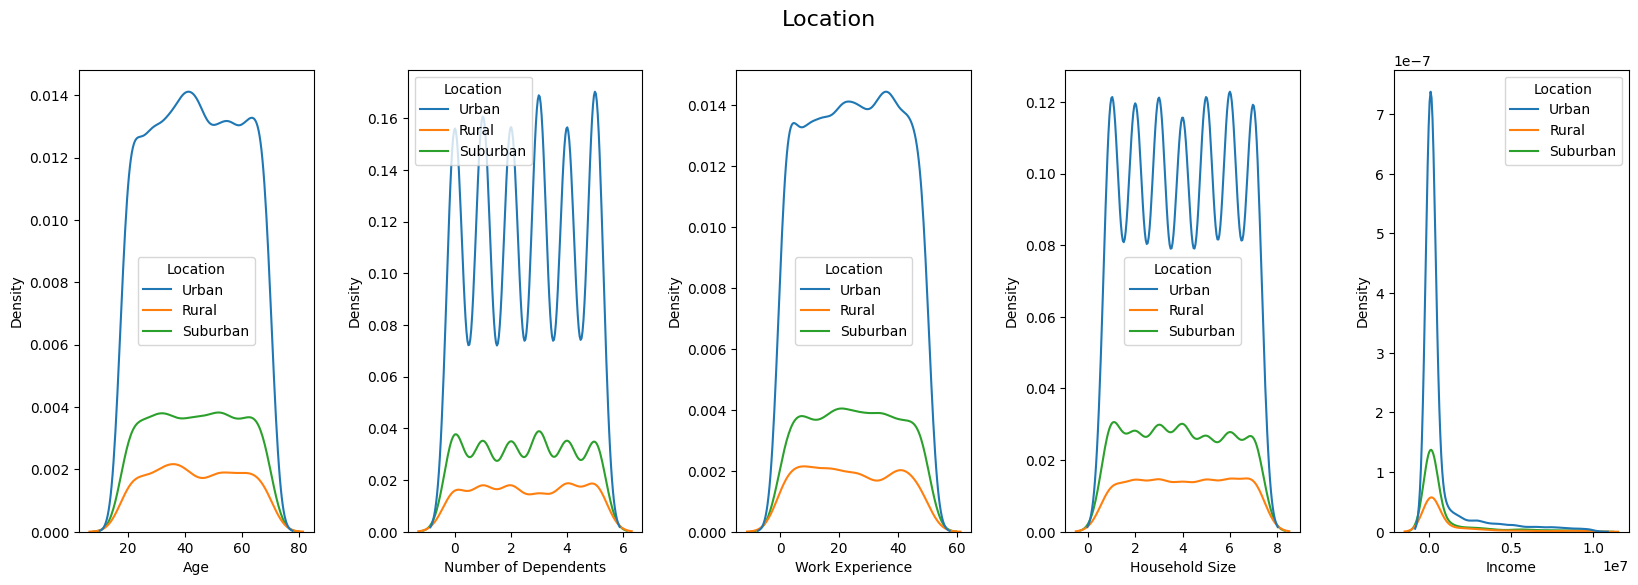

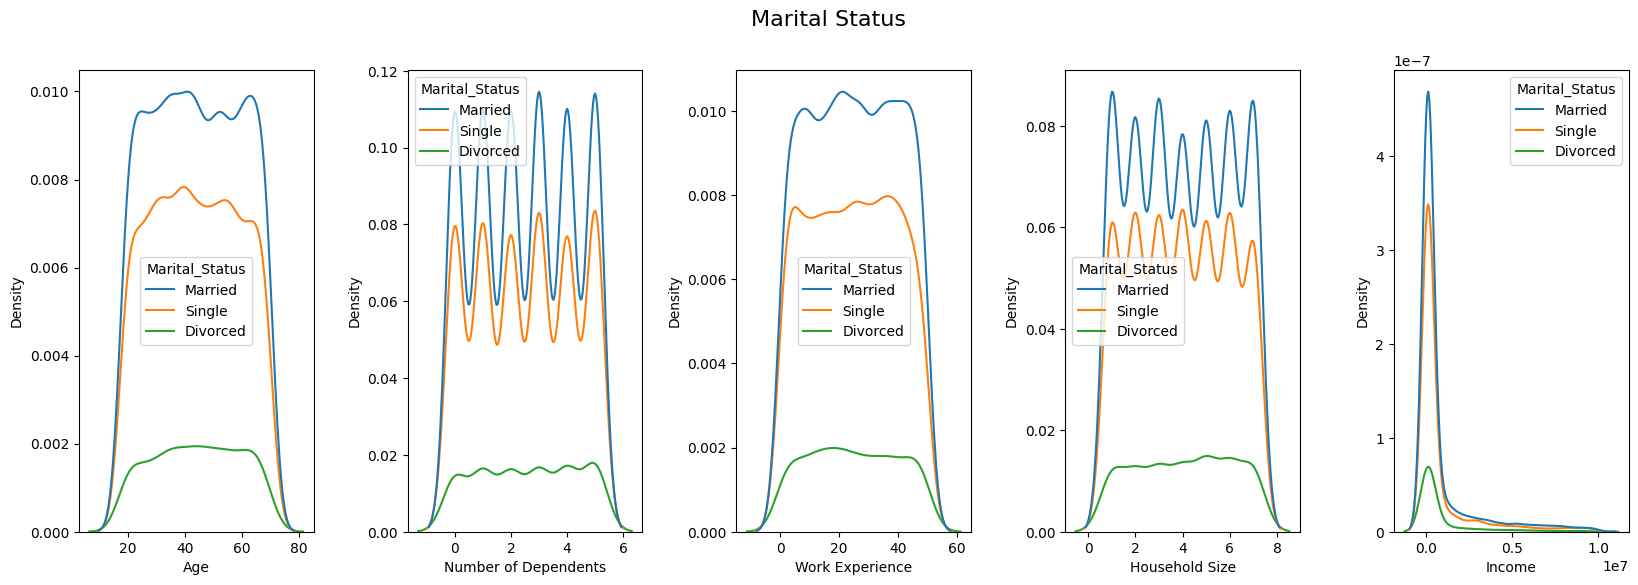

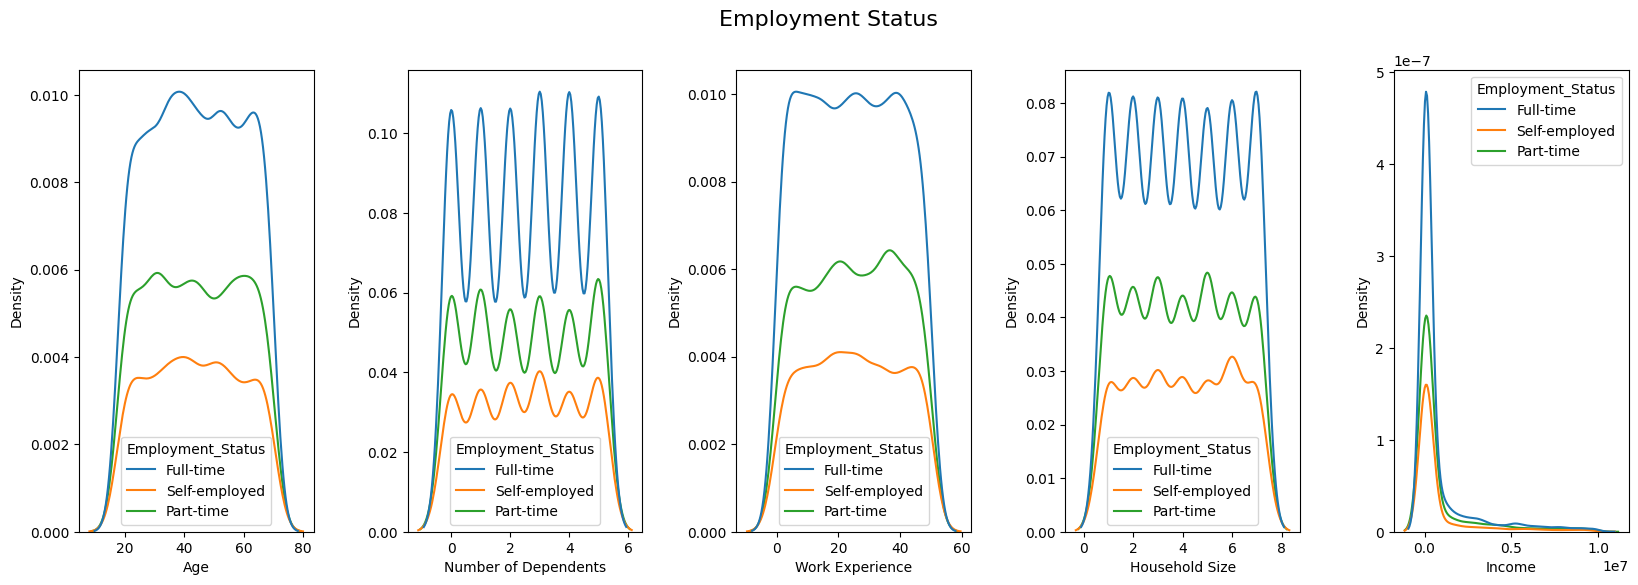

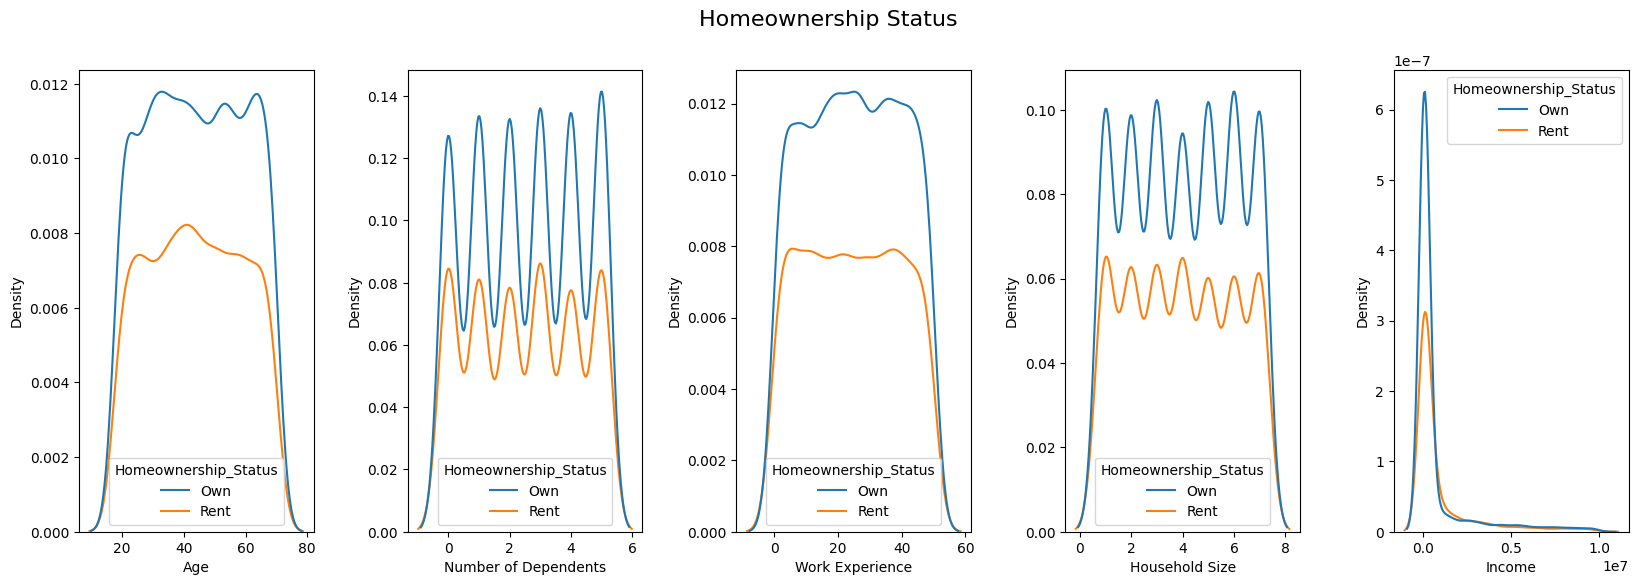

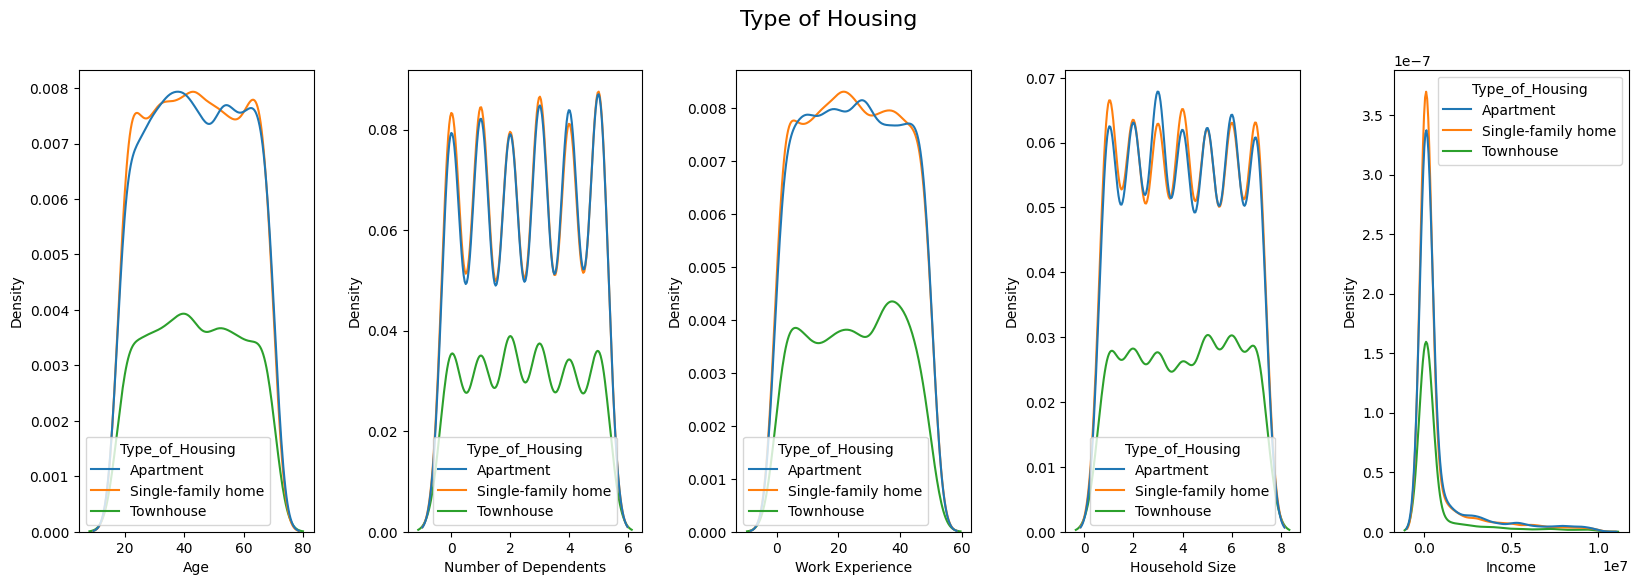

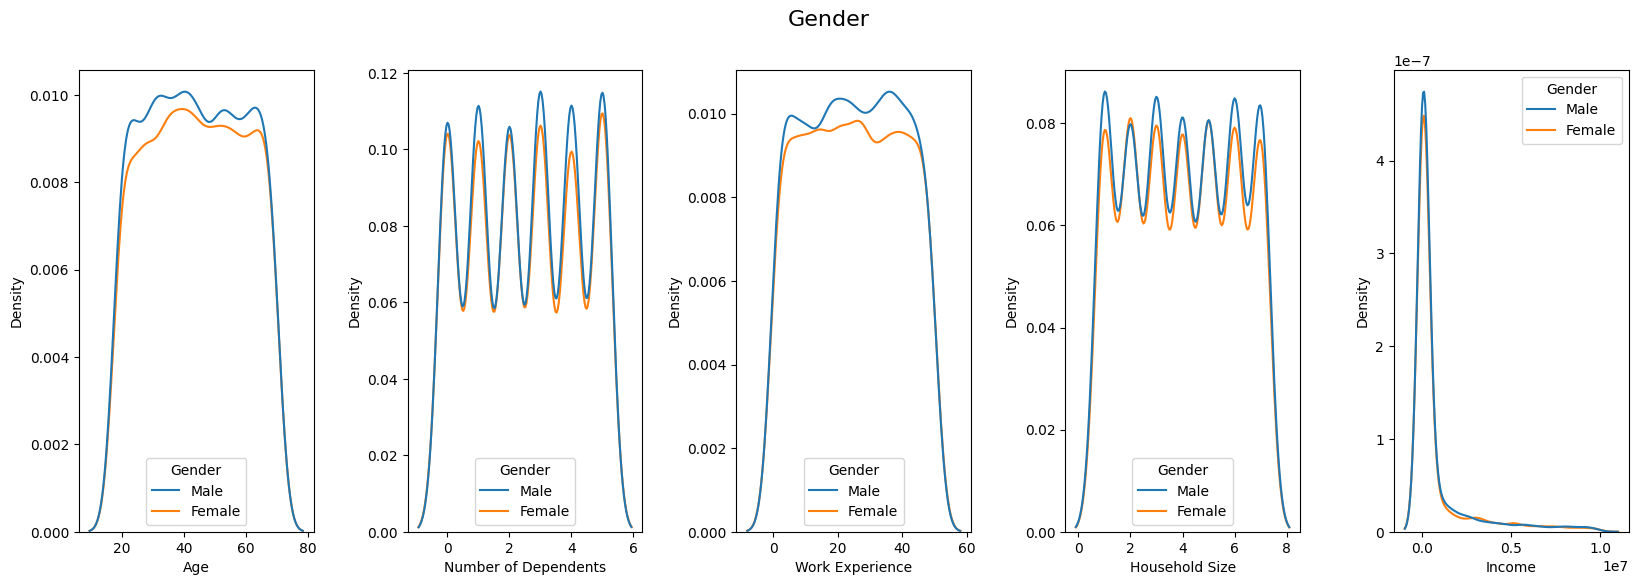

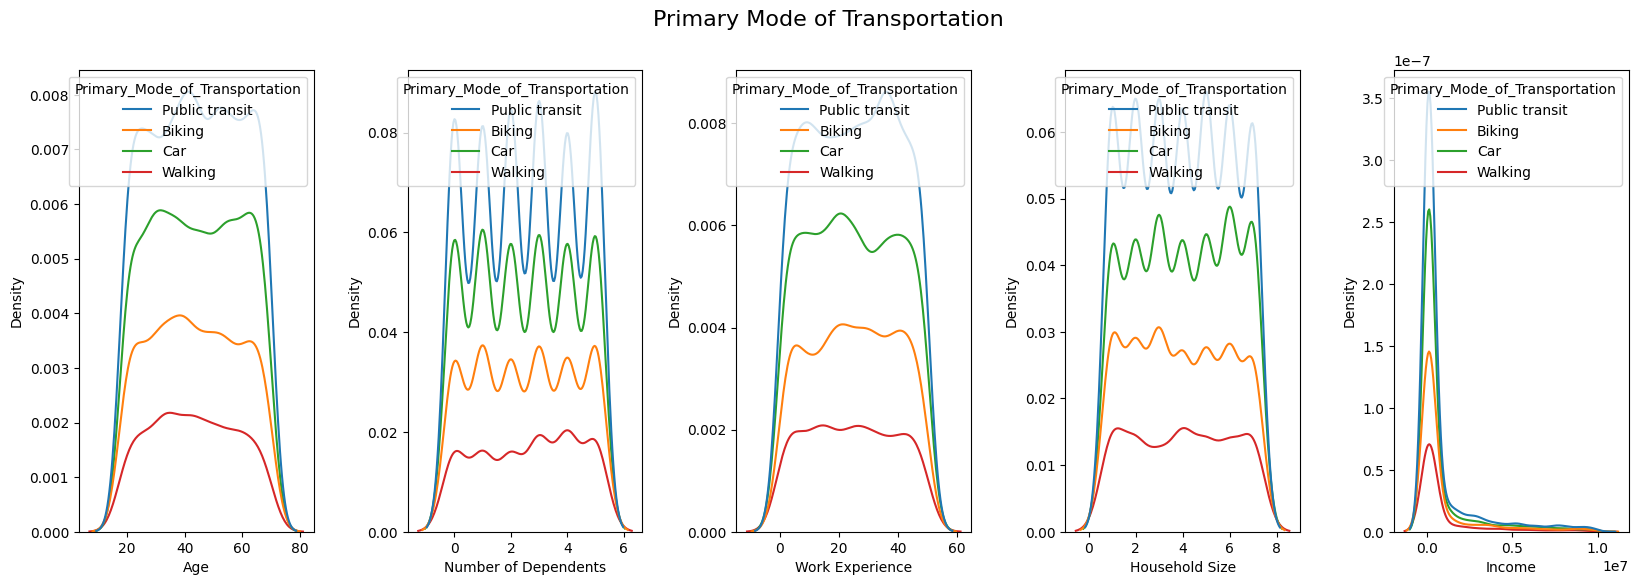

In [31]:
# Loop through each categorical column in cat_cols
for cat_col in cat_cols:
    # Create a figure with 5 subplots (one for each numerical column), figsize set to (20, 6)
    fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 6))
    # Set a title for the entire figure, replacing underscores with spaces
    fig.suptitle(cat_col.replace('_', ' '), fontsize=16)
    
    # Loop through each numerical column in num_cols
    for i, num_col in enumerate(num_cols):
        # Plot a kernel density estimate (kdeplot) for each combination of num_col and cat_col
        sns.kdeplot(data=data, x=num_col, hue=cat_col, ax=axes[i])
        
        # Set xlabel for the subplot, replacing underscores with spaces
        axes[i].set_xlabel(num_col.replace('_', ' '))
    
    # Adjust the horizontal space between subplots
    plt.subplots_adjust(wspace=0.4)
    
    # Display the plot
    plt.show()
        

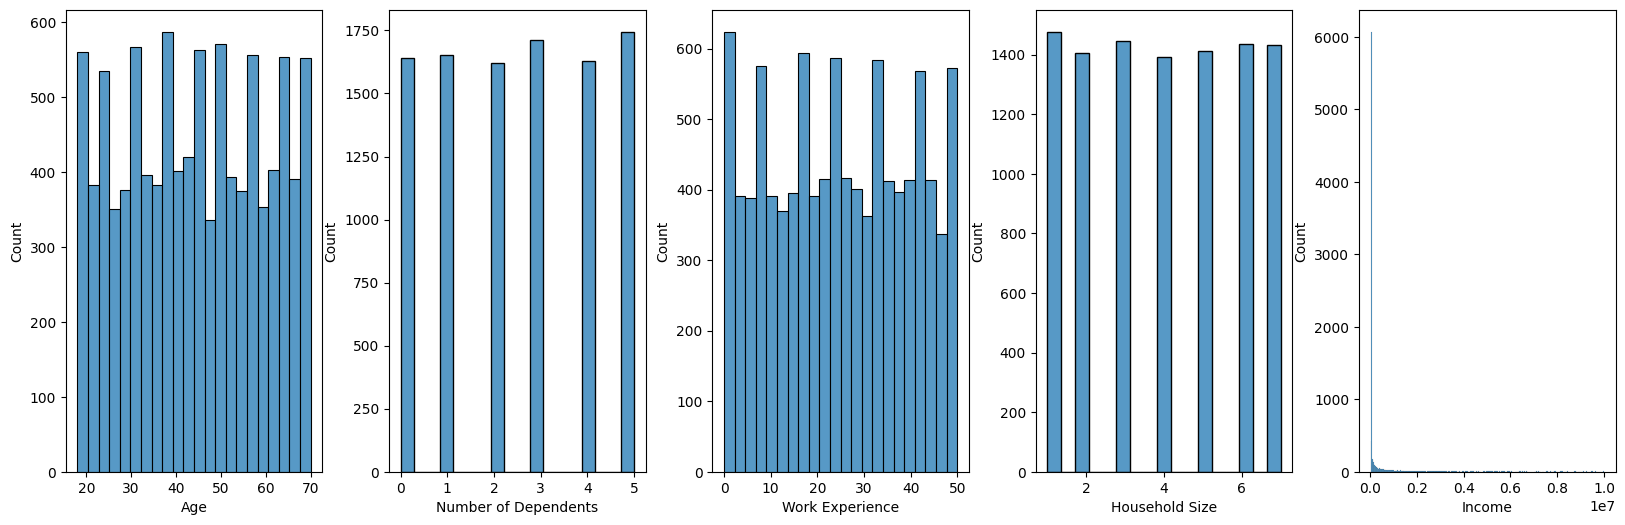

In [32]:
# Create a figure with 5 subplots (one for each numerical column), figsize set to (20, 6)
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 6))

# Loop through each numerical column in num_cols
for i, col in enumerate(num_cols):
    # Plot a histogram for each numerical column on its corresponding subplot
    sns.histplot(data=data, x=col, ax=axes[i])
    
    # Set xlabel for the subplot
    axes[i].set_xlabel(col.replace('_', ' '))
    
# Adjust the horizontal space between subplots
plt.subplots_adjust(wspace=0.26)

# Display the plot
plt.show()

Statistical Ananlysis

In [33]:
# Filter data for incomes of males
male = data[data['Gender'] == 'Male']['Income']

# Filter data for incomes of females
female = data[data['Gender'] == 'Female']['Income']


In [34]:
import scipy.stats as stats

# Perform an independent two-sample t-test between the income distributions of males and females
ex = stats.ttest_ind(male, female, equal_var=False)

# Print the result of the t-test
print(f"T-Statistic: {ex.statistic}")
print(f"P-Value: {ex.pvalue}")

# Compare p-value to significance level (0.05)
if ex.pvalue > 0.05:
    print('Both genders receive almost the same income.')
else:
    print('Males receive more income than females.')

T-Statistic: -0.2217725608645894
P-Value: 0.8244954844170365
Both genders receive almost the same income.


In [35]:
# Create groups of income based on unique categories of 'Number_of_Dependents'
groups = [data[data['Number_of_Dependents'] == category]['Income'] for category in data['Number_of_Dependents'].unique()]

# Performing one-way ANOVA
f_stat, p_value = stats.f_oneway(*groups)

# Print the results
print(f"F-Statistic: {f_stat}")
print(f"P-Value: {p_value}")

F-Statistic: 1.0983483678004828
P-Value: 0.3589274584047284


In [36]:
# Preparing the data for regression
X = data['Work_Experience']
Y = data['Income']

# Adding a constant to the independent variable (intercept)
X = sm.add_constant(X)

# Performing linear regression
model = sm.OLS(Y, X).fit()

# Printing the regression results
print(model.summary())
print('\n')
# Interpretation
print(f"R-squared: {model.rsquared}")
print('\n')
print(f"P-Value of WorkExperience: {model.pvalues['Work_Experience']}")
print('\n')
if model.pvalues['Work_Experience'] > 0.05:
    print("There is no statistically significant relationship between work experience and income.")
else:
    print("There is a statistically significant relationship between work experience and income.")

                            OLS Regression Results                            
Dep. Variable:                 Income   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     7.589
Date:                Tue, 09 Jul 2024   Prob (F-statistic):            0.00588
Time:                        18:55:11   Log-Likelihood:            -1.5833e+05
No. Observations:               10000   AIC:                         3.167e+05
Df Residuals:                    9998   BIC:                         3.167e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            9.019e+05   3.59e+04     

Feature Engineering

In [37]:
# Calculate income per capita by dividing total income by household size
data['Income_Per_Capita'] = data['Income'] / data['Household_Size']



In [38]:
# Calculate total household members by summing number of dependents and household size
data['Total_Household_Members'] = data['Number_of_Dependents'] + data['Household_Size']


In [39]:
# Calculate work experience in decades by dividing work experience by 10
data['Work_Experience_Decades'] = data['Work_Experience'] // 10


Outliers 

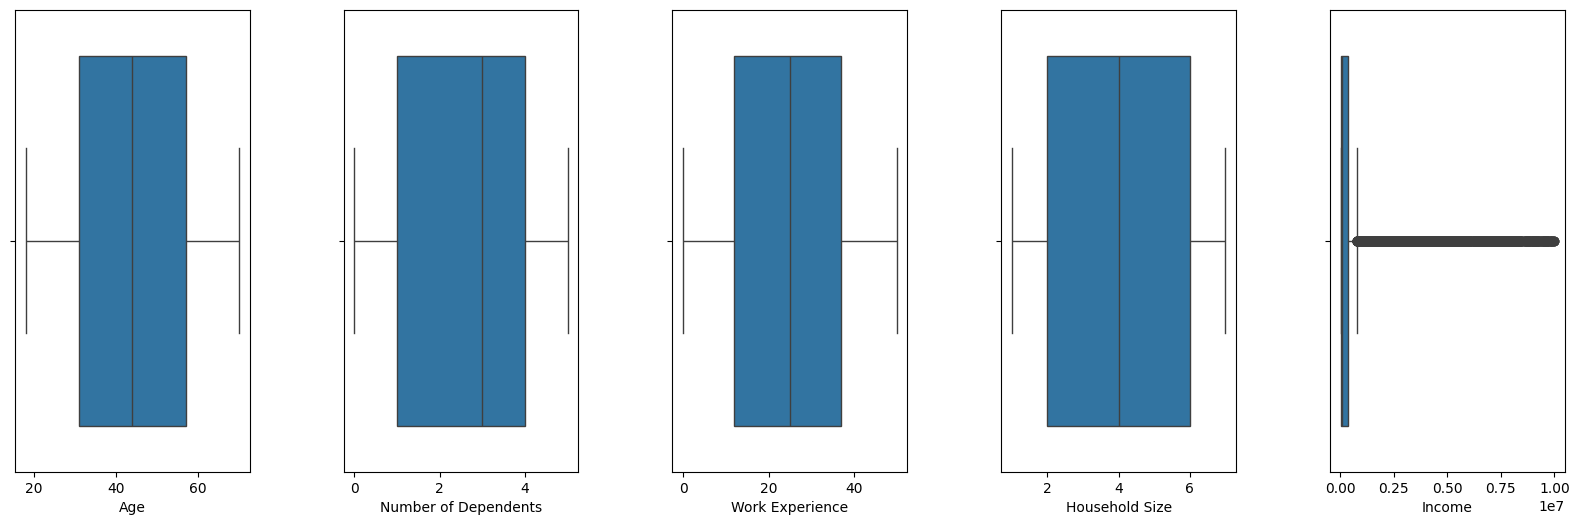

In [40]:
# Create a figure with 5 subplots (one for each numerical column), figsize set to (20, 6)
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 6))

# Loop through each numerical column in num_cols
for i, num_col in enumerate(num_cols):
    # Plot a boxplot for each numerical column on its corresponding subplot
    sns.boxplot(data=data, x=num_col, ax=axes[i])
    
    # Set xlabel for the subplot
    axes[i].set_xlabel(num_col.replace('_', " "))

# Adjust the horizontal space between subplots
plt.subplots_adjust(wspace=0.4)

# Display the plot
plt.show()


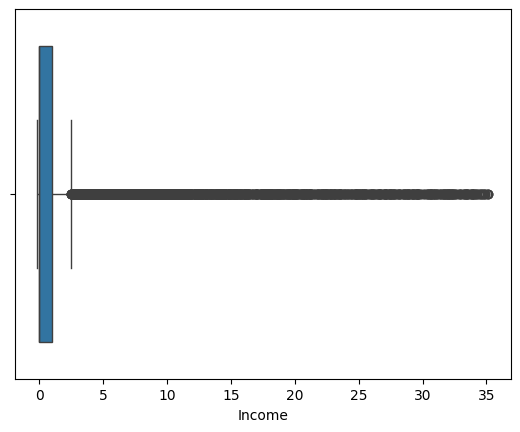

In [41]:

# Initialize RobustScaler
robost = RobustScaler()

# Scale the 'Income' column using RobustScaler
data['Income'] = robost.fit_transform(data[['Income']])

# Plot a boxplot to visualize the scaled 'Income' column distribution
sns.boxplot(data=data, x='Income')


# Show the plot
plt.show()


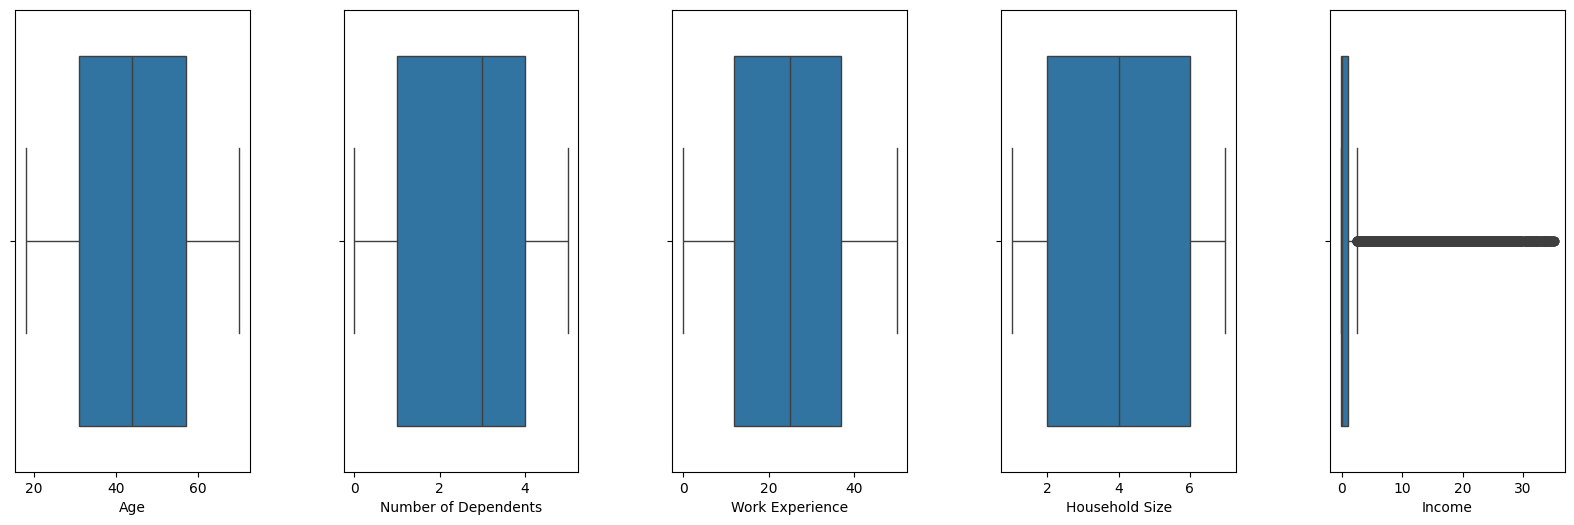

In [42]:
# Create a figure with 5 subplots (one for each numerical column), figsize set to (20, 6)
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 6))

# Loop through each numerical column in num_cols
for i, num_col in enumerate(num_cols):
    # Plot a boxplot for each numerical column on its corresponding subplot
    sns.boxplot(data=data, x=num_col, ax=axes[i])
    
    # Set xlabel for the subplot
    axes[i].set_xlabel(num_col.replace('_', " "))

# Adjust the horizontal space between subplots
plt.subplots_adjust(wspace=0.4)

# Display the plot
plt.show()


In [43]:
# Create training features by dropping the 'Income' column from the dataset
train = data.drop(labels=['Income'], axis=1)

# Create the target variable 'feature' using the 'Income' column
feature = data['Income']


Model

In [44]:
# Split the dataset into training and testing sets
# x_train and x_test are the training and testing features, respectively
# y_train and y_test are the corresponding training and testing target variables (in this case, 'Income')
x_train, x_test, y_train, y_test = train_test_split(train, feature, test_size=0.25, random_state=50)


In [45]:
# Exclude the first element from cat_cols
cat_cols = cat_cols[1:]


In [46]:
# Perform one-hot encoding on categorical columns in x_train
x_train = pd.get_dummies(x_train, columns=cat_cols, dtype='int')

# Perform one-hot encoding on categorical columns in x_test
x_test = pd.get_dummies(x_test, columns=cat_cols, dtype='int')


In [47]:
# Map categorical 'Education_Level' values to numerical values in x_train
x_train['Education_Level'] = x_train['Education_Level'].map({"Master's": 2, 'High School': 0, "Bachelor's": 1, 'Doctorate': 3})

# Map categorical 'Education_Level' values to numerical values in x_test
x_test['Education_Level'] = x_test['Education_Level'].map({"Master's": 2, 'High School': 0, "Bachelor's": 1, 'Doctorate': 3})


In [48]:
# Initialize Gradient Boosting Regressor model
gb_model = GradientBoostingRegressor()

# Fit the model on the training data
gb_model.fit(x_train, y_train)


GradientBoostingRegressor()

In [49]:
# Use the trained model to predict on the test data
y_pred = gb_model.predict(x_test)

# Calculate the R^2 score of the model on the test data
print(f"Training R^2 Score: {gb_model.score(x_train, y_train):.4f}")
print(f"Testing R^2 Score: {gb_model.score(x_test, y_test):.4f}")
# Print a blank line for readability
print('\n')

# Calculate and print the Mean Absolute Error (MAE) between y_test and y_pred
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# Print a blank line for readability
print('\n')

# Calculate and print the Root Mean Squared Error (RMSE) between y_test and y_pred
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse}")

Training R^2 Score: 0.9985
Testing R^2 Score: 0.9979


Mean Absolute Error (MAE): 0.13476178044578233


Root Mean Squared Error (RMSE): 0.30244217531345785
